# Problem Statement

To build a model to accurately classify a piece of news as REAL or FAKE.

Using sklearn, build a TfidfVectorizer on the provided dataset. Then, initialize a PassiveAggressive Classifier and fit the model. In the end, the accuracy score and the confusion matrix tell us how well our model fares.

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.externals import joblib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

### Load the data

In [2]:
data = pd.read_csv('news.csv')
data.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [26]:
data.count()

Unnamed: 0    6335
title         6335
text          6335
label         6335
dtype: int64

In [4]:
data.shape

(6335, 4)

In [5]:
data['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

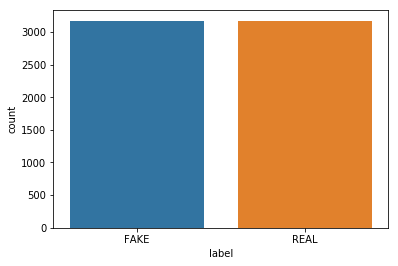

In [6]:
sns.countplot(data['label'],label = 'Count')

In [25]:
data['title'].value_counts()

OnPolitics | 's politics blog                                                                                                          5
Michael Moore Owes Me $4.99                                                                                                            3
Hillary’s “Big Tent” is Obama’s “Grand Bargain” on Steroids                                                                            3
Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence                                     3
Project Veritas 4: Robert Creamer's Illegal $20,000 Foreign Wire Transfer Caught On Tape                                               2
US abstains from UN vote calling for end to Cuban embargo                                                                              2
Police arrest 141 in crackdown on North Dakota pipeline protesters                                                                     2
Political polarization is getting worse. 

In [7]:
data['text'].value_counts()

Killing Obama administration rules, dismantling Obamacare and pushing through tax reform are on the early to-do list.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [8]:
data['title'].value_counts()

OnPolitics | 's politics blog                                                                                                          5
Michael Moore Owes Me $4.99                                                                                                            3
Hillary’s “Big Tent” is Obama’s “Grand Bargain” on Steroids                                                                            3
Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence                                     3
Project Veritas 4: Robert Creamer's Illegal $20,000 Foreign Wire Transfer Caught On Tape                                               2
US abstains from UN vote calling for end to Cuban embargo                                                                              2
Police arrest 141 in crackdown on North Dakota pipeline protesters                                                                     2
Political polarization is getting worse. 

In [9]:
labels = data.label

In [10]:
features = data['text']

### Splitting the training and testing data

In [11]:
x_train,x_test,y_train,y_test=train_test_split(features , labels, test_size=0.25, random_state=4)

### Creating the vectorizer

In [12]:
tfidf_vectorizer=TfidfVectorizer(max_df=0.7, analyzer='word',sublinear_tf = True)

### Fit the model on training set

In [13]:
data_train=tfidf_vectorizer.fit_transform(x_train) 
data_test=tfidf_vectorizer.transform(x_test)

In [14]:
data_test.shape

(1584, 59520)

In [24]:
data_train.shape

(4751, 59520)

### Creating the model

In [15]:
model=PassiveAggressiveClassifier(max_iter=50)
model.fit(data_train,y_train)

C:\Users\Ketki Nirantar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              early_stopping=False, fit_intercept=True, loss='hinge',
              max_iter=50, n_iter=None, n_iter_no_change=5, n_jobs=None,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [22]:
type(model)

sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier

### Dumping the file usnig JobLib


In [16]:
Sav_Model = 'finalized_model.sav'
joblib.dump(model, Sav_Model)

['finalized_model.sav']

### Load the model from disk

In [17]:
loaded_model = joblib.load(Sav_Model)
y_pred=model.predict(data_test)

### Calculate the accuracy of the model

In [23]:
score=accuracy_score(y_test,y_pred)
print("Accuracy: ",round(score*100,2))

Accuracy:  94.76


In [19]:
# Build the confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[730,  41],
       [ 42, 771]], dtype=int64)